## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
# # >>conda install -c conda-forge mlflow
# # >>conda install -c conda-forge/label/broken mlflow
# # >>conda install -c conda-forge/label/cf202003 mlflow
# # >>mlflow server --backend-store-uri 'C:\temp\mlflow\localserver'
# # Open http://127.0.0.1:5000 in your browser to access MLflow

# warnings.simplefilter('ignore')
# # Set mlflow tracking URI to your local mlflow tracking server
# mlflow.set_tracking_uri("http://127.0.0.1:5000")

# # This API will set the experiment name in MLFLow. If the experiment does't exist then it will create it
# mlflow.set_experiment("Traffic Image Classification2")

# mlflow.start_run(run_name="Run_1")

## Assigning path for Dataset

In [2]:
data_dir = r'C:\Users\Abhishek\Desktop\Practice Python\CIS 325\Assignment 3'
train_path = r'C:\Users\Abhishek\Desktop\Practice Python\CIS 325\Assignment 3\Train'
test_path = r'C:\Users\Abhishek\Desktop\Practice Python\CIS 325\Assignment 3\Test'

In [3]:
# Finding Total Categories

Categories = len(os.listdir(train_path))

print(Categories)

43


In [4]:
print(len(os.listdir(test_path)))

12631


## Labels

In [5]:
classes = { 0:'Speed Limit (20km/h)',
            1:'Speed Limit (30km/h)', 
            2:'Speed Limit (50km/h)', 
            3:'Speed Limit (60km/h)', 
            4:'Speed Limit (70km/h)', 
            5:'Speed Limit (80km/h)', 
            6:'End of Speed Limit (80km/h)', 
            7:'Speed Limit (100km/h)', 
            8:'Speed Limit (120km/h)', 
            9:'No Passing', 
            10:'No Passing Vehicle Over 3.5 Tons', 
            11:'Right-of-way at Intersection', 
            12:'Priority Road', 
            13:'Yield', 
            14:'Stop', 
            15:'No Vehicles', 
            16:'Vehicles > 3.5 tons prohibited', 
            17:'No Entry', 
            18:'General Caution', 
            19:'Dangerous Curve Left', 
            20:'Dangerous Curve Right', 
            21:'Double Curve', 
            22:'Bumpy Road', 
            23:'Slippery Road', 
            24:'Road narrows on the right', 
            25:'Road Work', 
            26:'Traffic Signals', 
            27:'Pedestrians', 
            28:'Children Crossing', 
            29:'Bicycles Crossing', 
            30:'Beware of Ice/Snow',
            31:'Wild Animals Crossing', 
            32:'End speed + passing limits', 
            33:'Turn Right Ahead', 
            34:'Turn Left Ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Data Visualization

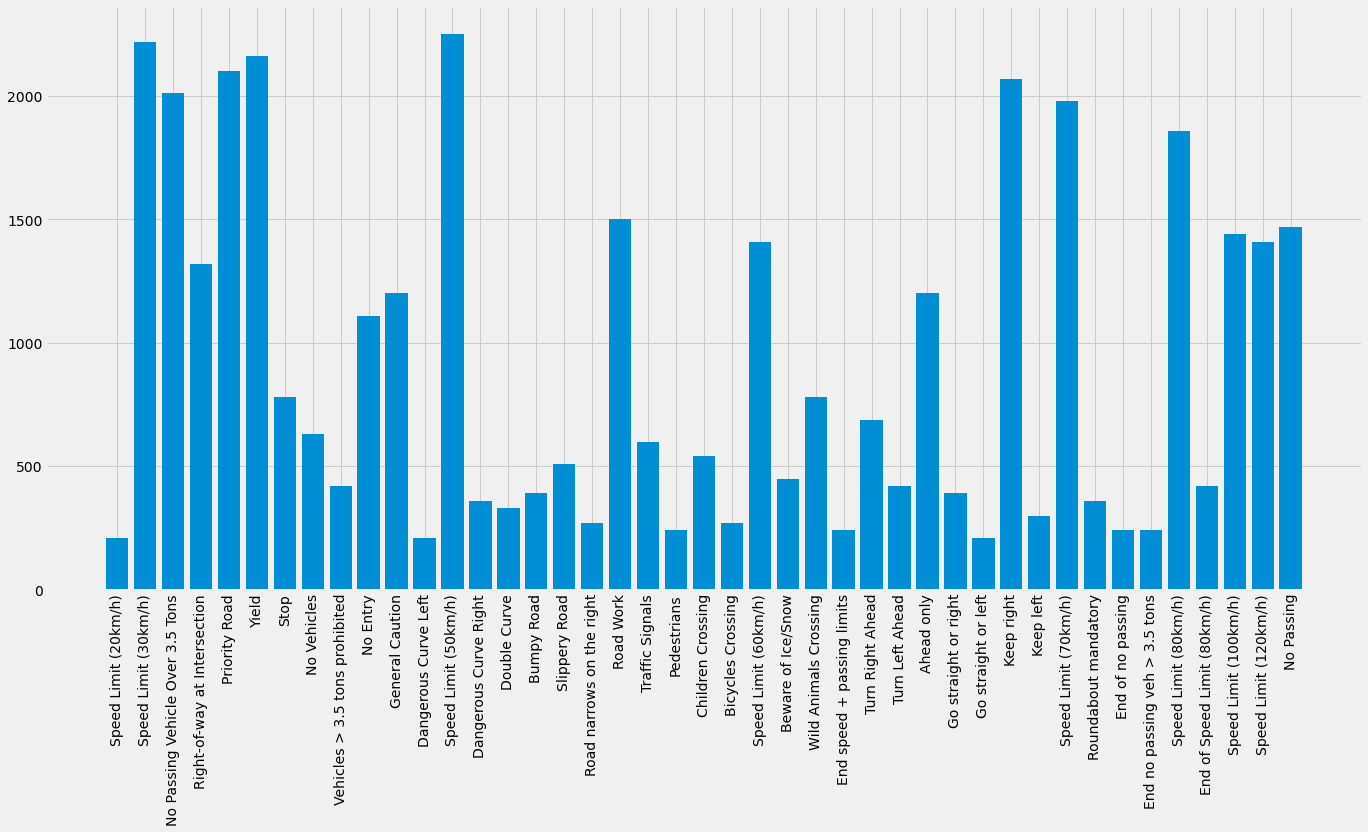

In [6]:
x = os.listdir(train_path)

train_list = []
class_list = []

for x in x:
    train_files = os.listdir(train_path + '/' + x)
    train_list.append(len(train_files))
    class_list.append(classes[int(x)])
    
# # Sorting the dataset on the basis of number of images in each class
# zipped_lists = zip(train_number, class_num)
# sorted_pairs = sorted(zipped_lists)
# tuples = zip(*sorted_pairs)
# train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_list, train_list)
plt.xticks(class_list, rotation='vertical')
plt.show()

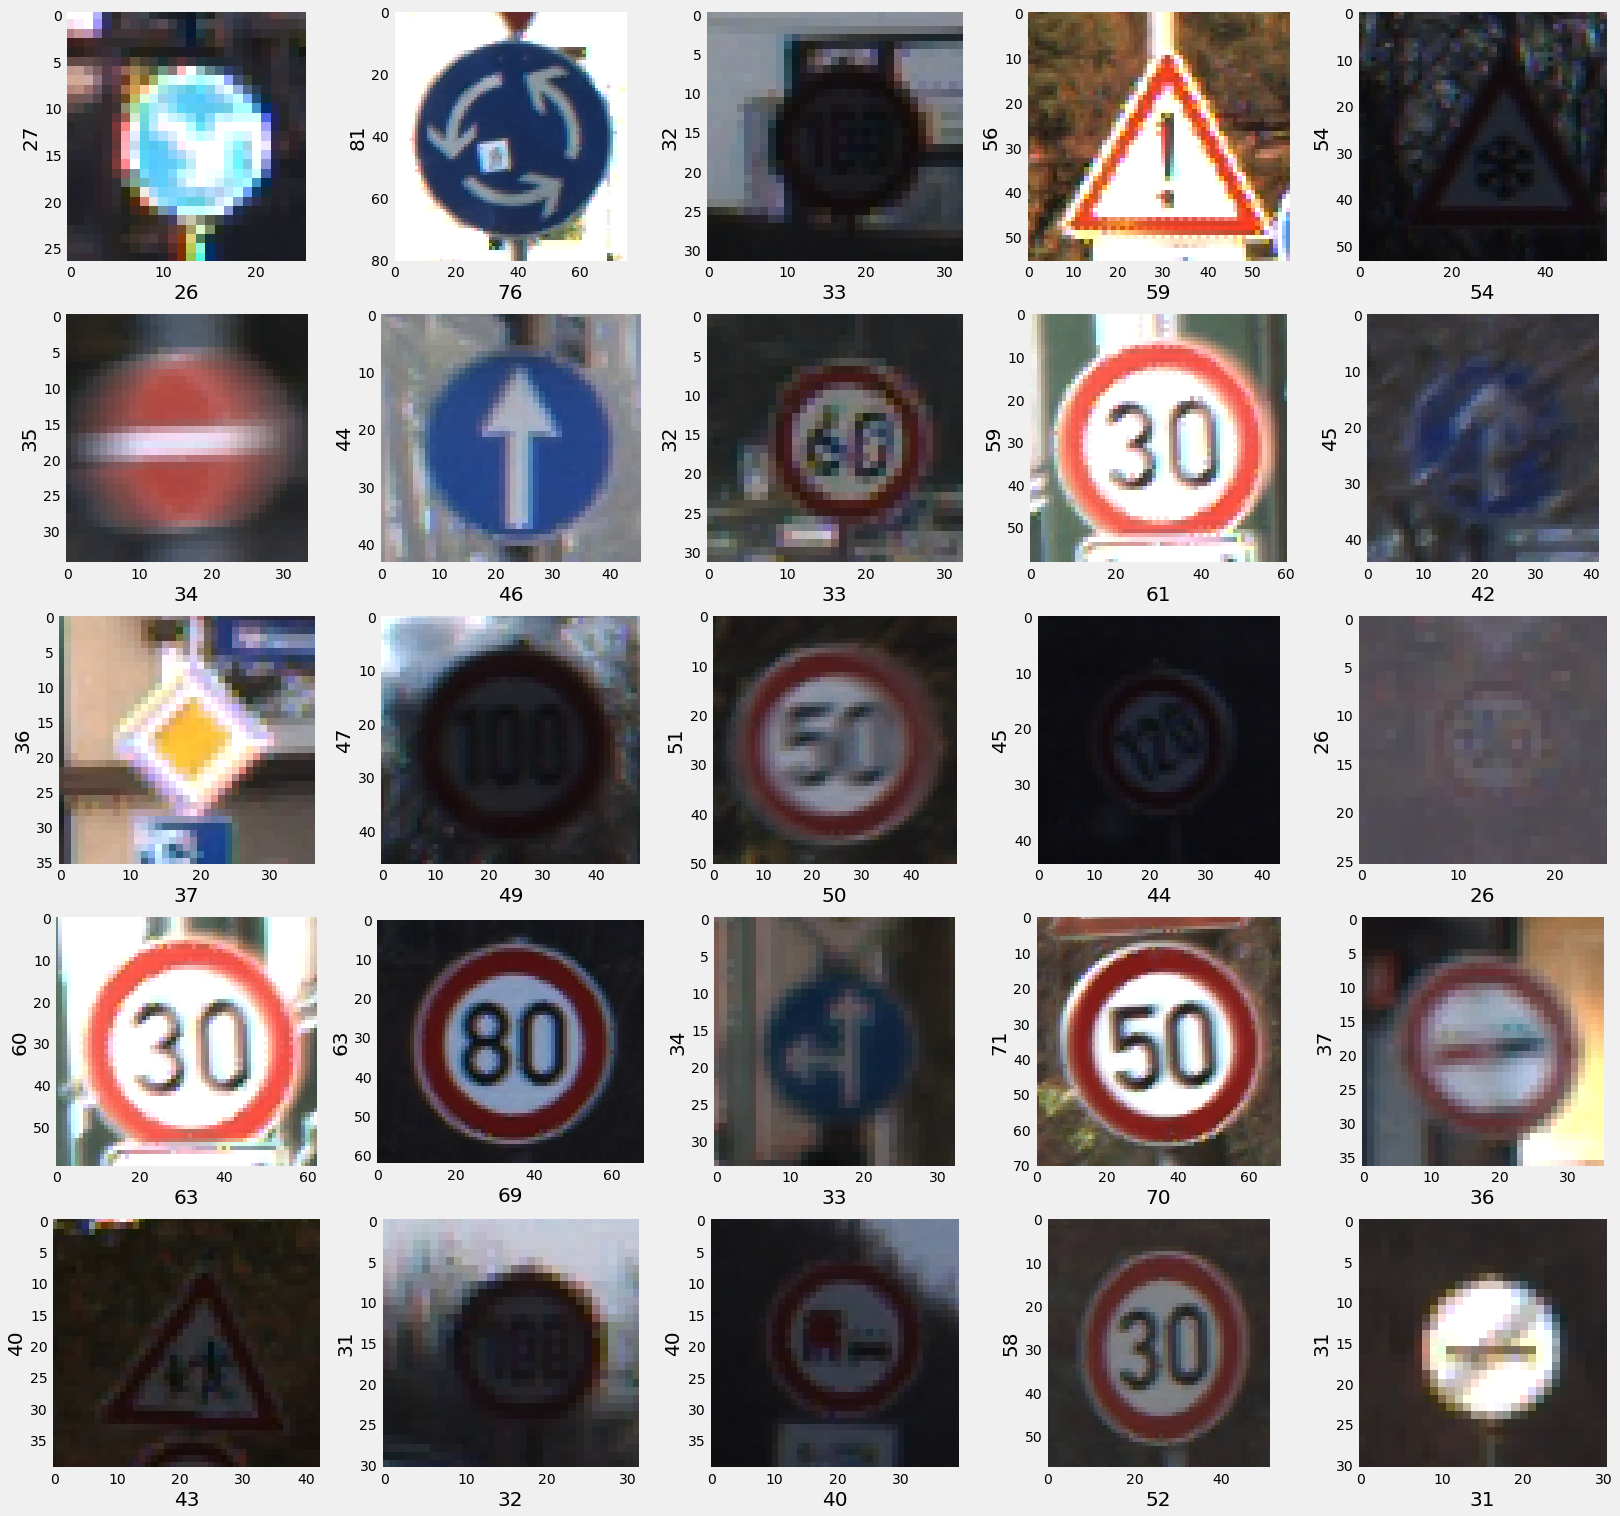

In [7]:
# Checking the images, how test data looks like

import random
from matplotlib.image import imread

test_data = pd.read_csv(data_dir + '/Test.csv')
imgs_data = test_data["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs_data)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [8]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
channels = 3


image_data = []
image_labels = []

for i in range(Categories):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 28, 28, 3) (39209,)


In [ ]:
# Spliting data into Training & validation sets
X_train, X_val, y_train, y_val = train_test_split(image_data, 
                                                  image_labels, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  shuffle=True)

# Normalizing Images 
X_train = X_train/255 
X_val = X_val/255

# Encoding Labels
y_train = keras.utils.to_categorical(y_train, Categories)
y_val = keras.utils.to_categorical(y_val, Categories)

# Creating Model
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')])

# Learning Rate
lr=0.002

# Epochs
epochs=5

# Optimizer
opt = tf.keras.optimizers.Adam(lr=lr, decay=lr/(epochs*0.5))

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model
# import mlflow.tensorflow
# mlflow.tensorflow.autolog(every_n_iter=1)

fit_1 = model.fit(X_train, y_train, epochs=epochs, 
                  batch_size=32, validation_data=(X_val, y_val))

## Splitting the data into Training and testing dataset

In [9]:
# X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# # From RGB to black and white 
# X_train = X_train/255 
# X_val = X_val/255

In [10]:
# # Label Encoder 

# y_train = keras.utils.to_categorical(y_train, Categories)
# y_val = keras.utils.to_categorical(y_val, Categories)

## Model Creation

In [11]:
# model = keras.models.Sequential([    
#     keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
#     keras.layers.BatchNormalization(axis=-1),
    
#     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
#     keras.layers.BatchNormalization(axis=-1),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(rate=0.5),
    
#     keras.layers.Dense(43, activation='softmax')
# ])

## Model Accuracy

In [12]:
# import warnings
# warnings.filterwarnings("ignore")

# lr = 0.001
# epochs = 10

# opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Training the model

In [13]:
# fit_1 = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
858/858 [==============================] - 56s 63ms/step - loss: 0.4214 - accuracy: 0.8901 - val_loss: 0.0498 - val_accuracy: 0.9869
Epoch 2/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0435 - accuracy: 0.9877 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 3/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0227 - val_accuracy: 0.9942
Epoch 4/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.0160 - val_accuracy: 0.9953
Epoch 5/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0157 - val_accuracy: 0.9961
Epoch 6/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0207 - val_accuracy: 0.9939
Epoch 7/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0144 - val_accuracy:

## Mode Evaluation

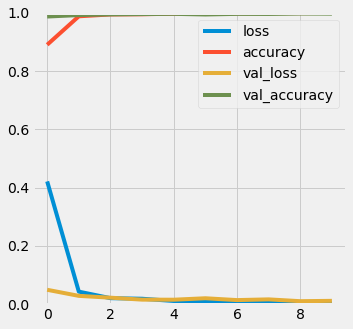

In [14]:
pd.DataFrame(fit_1.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
# Now applying this on our test data

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].ravel()
imgs = test["Path"].ravel()

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

X_test = X_test/255

pred = np.argmax(model.predict_on_batch(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)
#mlflow.log_metric("Test Accuracy", round(accuracy_score(labels, pred)*100,3))

Test Data accuracy:  97.35550277117973


## Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(labels, pred)

<AxesSubplot:>

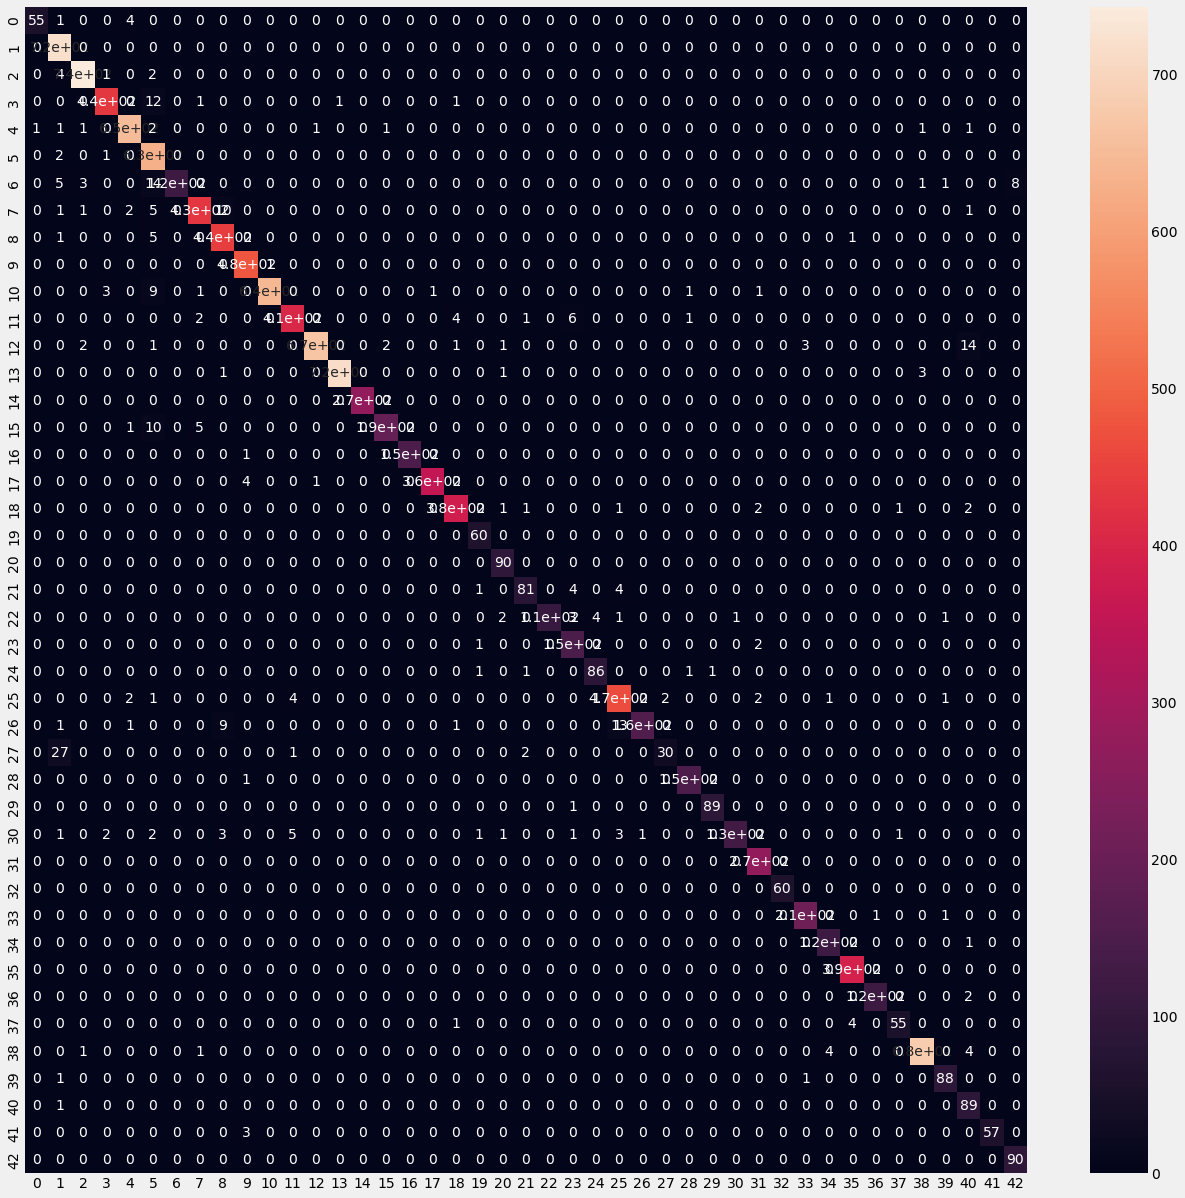

In [17]:
import seaborn as sns
matrix_DF = pd.DataFrame(matrix, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(matrix_DF, annot=True)

## Classification Report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.94      1.00      0.97       720
           2       0.99      0.99      0.99       750
           3       0.98      0.97      0.98       450
           4       0.98      0.99      0.99       660
           5       0.91      1.00      0.95       630
           6       1.00      0.79      0.88       150
           7       0.98      0.96      0.97       450
           8       0.95      0.98      0.97       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.98      0.97      0.97       420
          12       1.00      0.97      0.98       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      0.92      0.95       210
          16       1.00      0.99      1.00       150
          17       1.00    

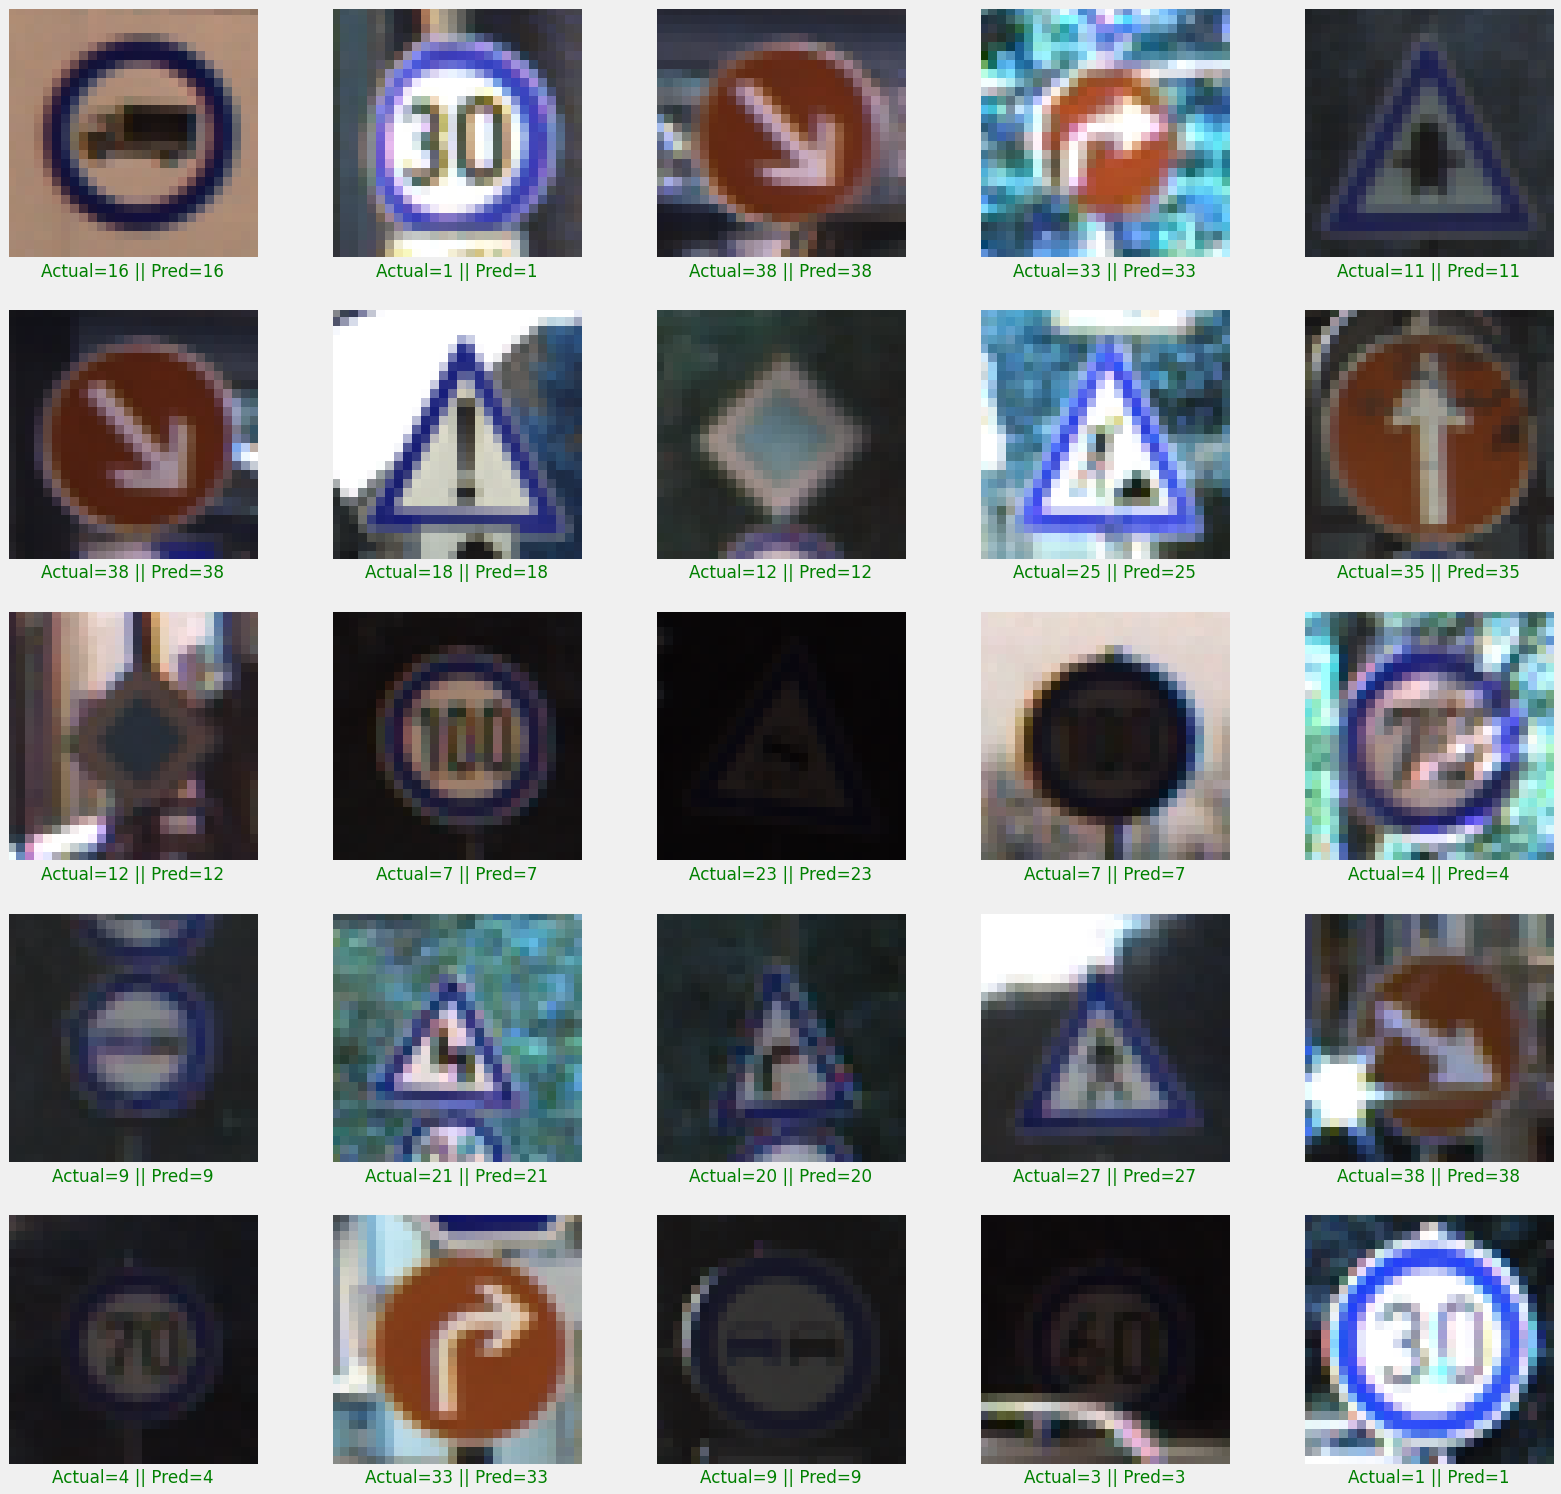

In [19]:
# Checking for results on predictions 

plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()